In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [42]:
# Importing the dataset
df_raw = pd.read_excel('datasets/Data _for_Lionel.xlsx')
df = df_raw.copy()

# change header to row 1 then drop row 1
df.columns = df.iloc[1]
df = df.drop(1)

# drop row 0 since it is not needed
df = df.drop(0)

# change NaN to 0 and x to 1
df = df.fillna(0)
df = df.replace('x',1)

# check index of row that has 'Total' in it
index = df[df['Members'] == 'Total'].index

# drop all rows after
df = df.iloc[:index[0]-2]

# save to csv
df.to_csv('datasets/Processed_data.csv', index=False)

In [2]:
# read csv
df = pd.read_csv('datasets/Processed_data.csv')

# take vectors and countries
vectors = df.iloc[:,1:].values
countries = df.iloc[:,0].values

In [3]:
# manhattan distance is used for binary data
def manhattan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

In [4]:
def jaccard_distance(v1, v2):
    # number of overlapped 1's divided by the rest except for overlapped 0's as we consider those less important
    overlap_1 = np.sum(np.logical_and(v1, v2))
    overlap_0 = np.sum(np.logical_and(np.logical_not(v1), np.logical_not(v2)))
    return overlap_1 / (len(v1) - overlap_0)

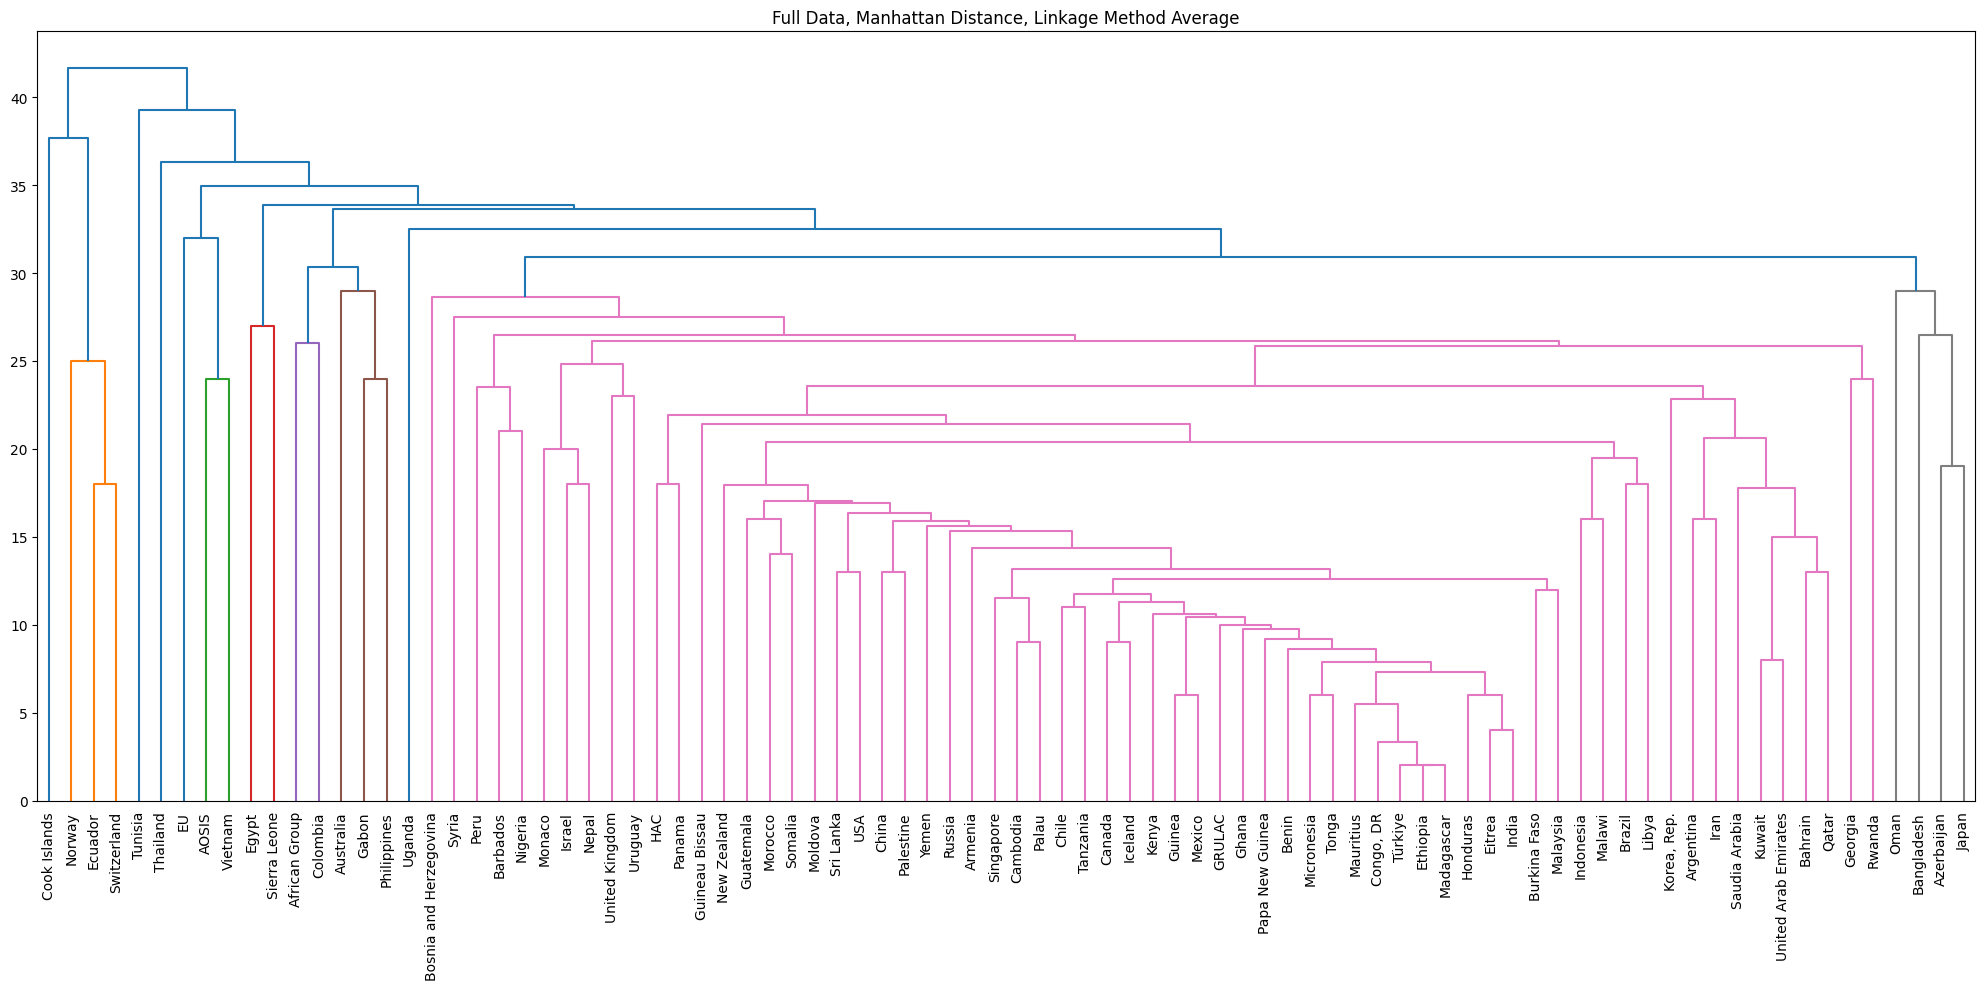

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(vectors, 'average', metric=manhattan_distance)
fig, ax = plt.subplots(1,1,figsize=(25, 10))

dn = dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10, ax=ax)
#save figure
ax.set_ylim(-0.05)
plt.title('Full Data, Manhattan Distance, Linkage Method Average')
fig.savefig('Figures/Entire_data_1/dendrogram_average.png', bbox_inches='tight')
plt.show()

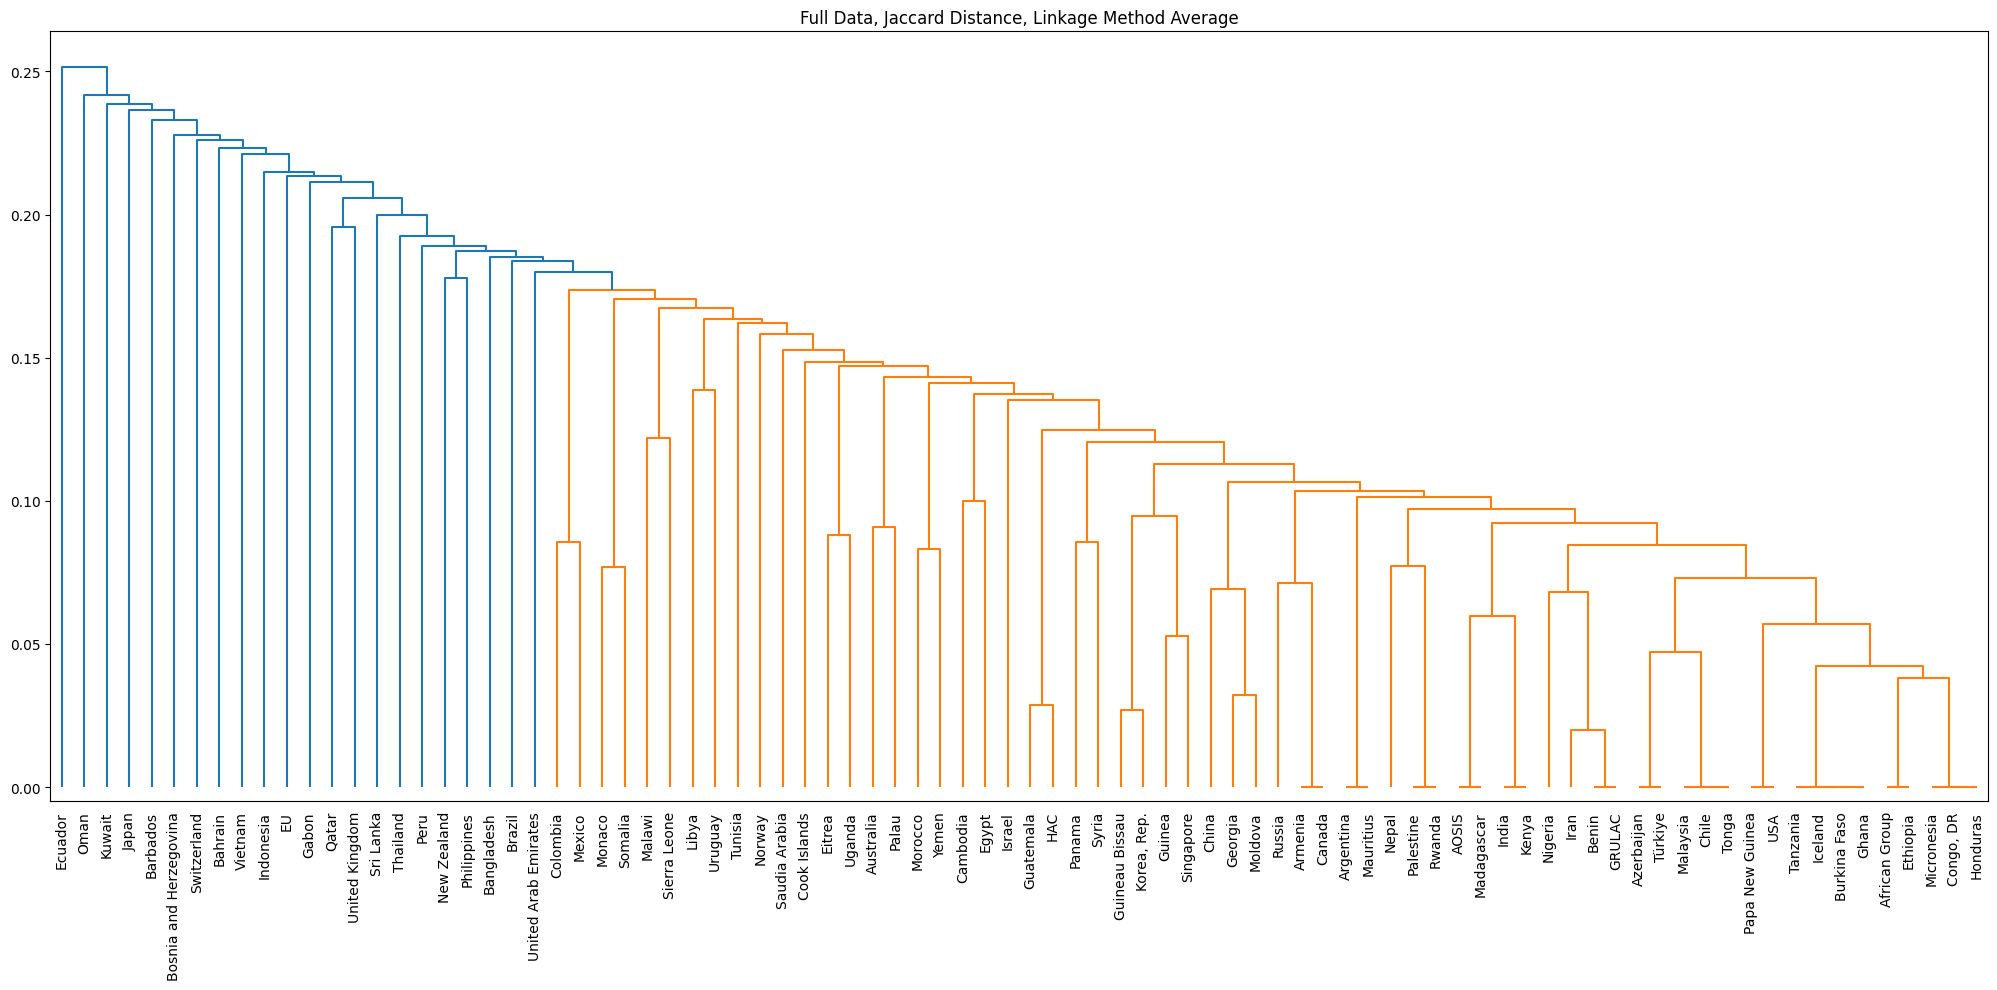

In [7]:
# same but for jaccard distance

Z = linkage(vectors, 'average', metric=jaccard_distance)
fig, ax = plt.subplots(1,1,figsize=(25, 10))

dn = dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10, ax=ax)
#save figure
ax.set_ylim(-0.005)
plt.title('Full Data, Jaccard Distance, Linkage Method Average')
fig.savefig('Figures/Entire_data_1/dendrogram_average_jaccard.png', bbox_inches='tight')

plt.show()

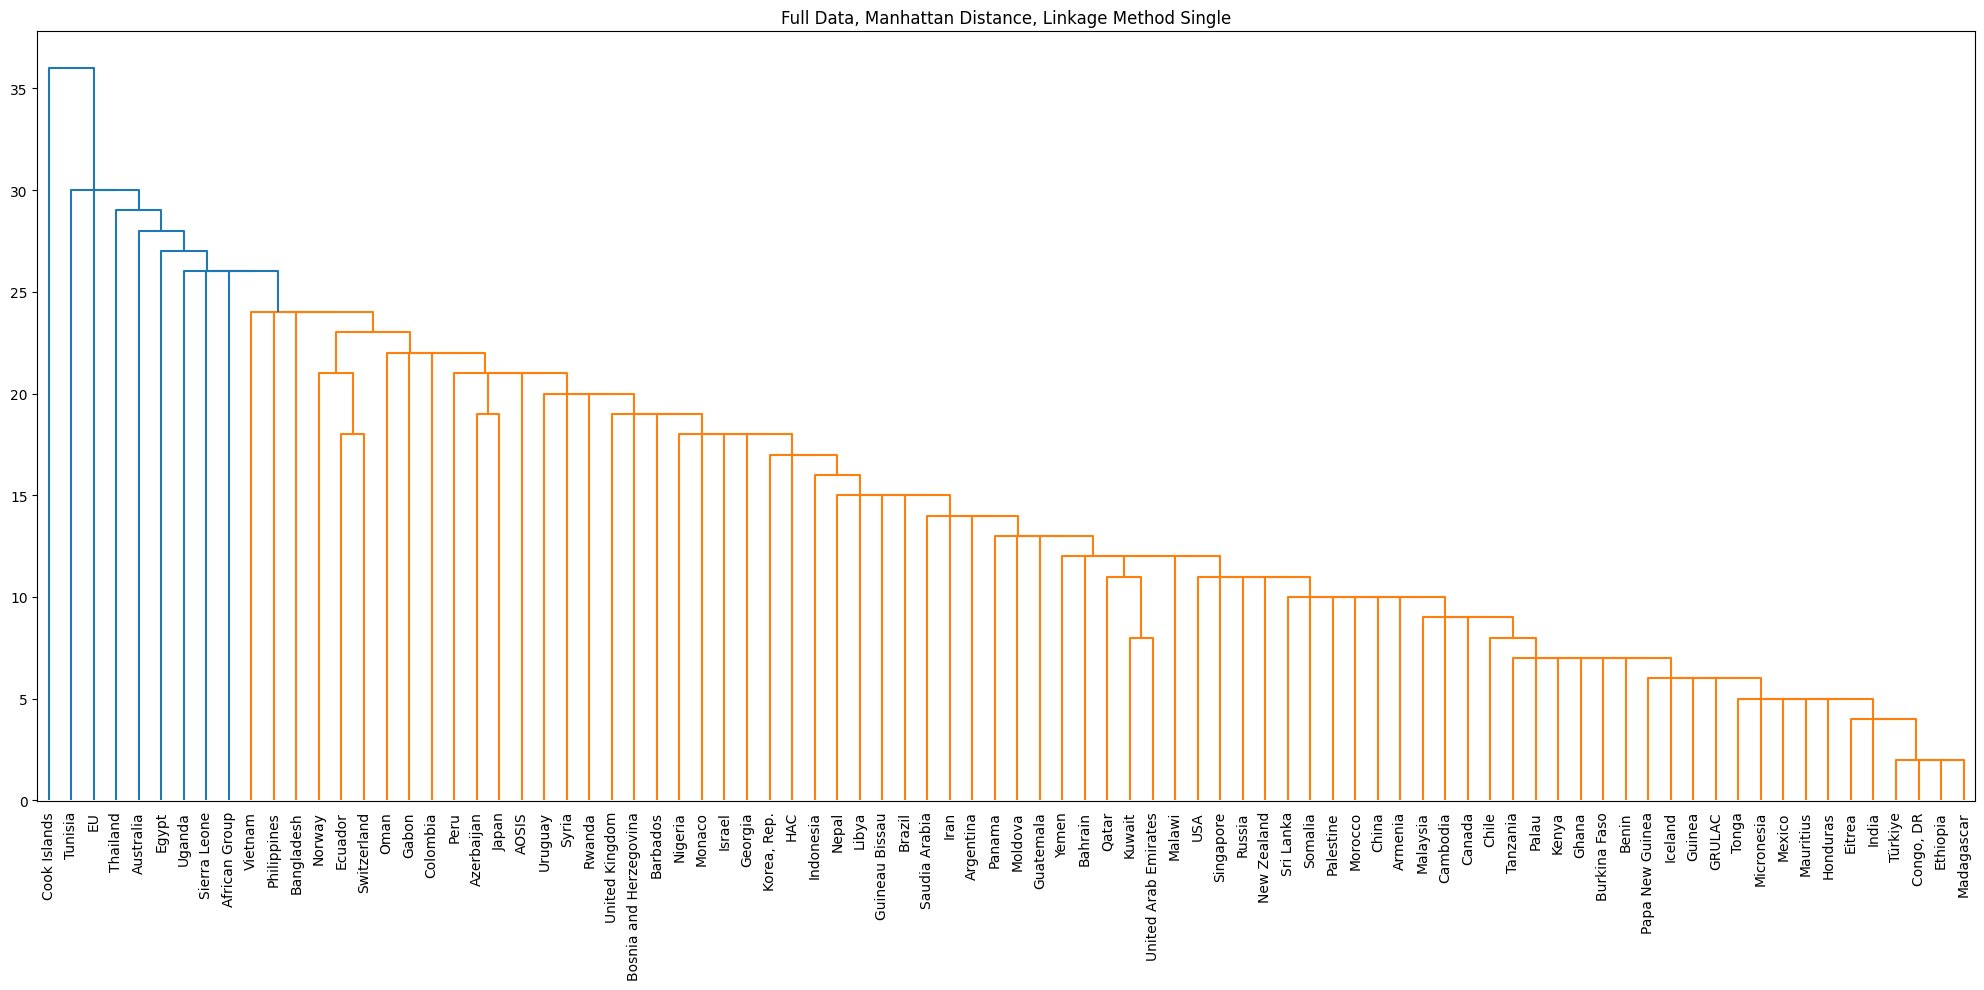

In [8]:
# same but for single linkage

Z = linkage(vectors, 'single', metric=manhattan_distance)
fig, ax = plt.subplots(1,1,figsize=(25, 10))

dn = dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10, ax=ax)
#save figure
ax.set_ylim(-0.05)
plt.title('Full Data, Manhattan Distance, Linkage Method Single')
fig.savefig('Figures/Entire_data_1/dendrogram_single.png', bbox_inches='tight')

plt.show()


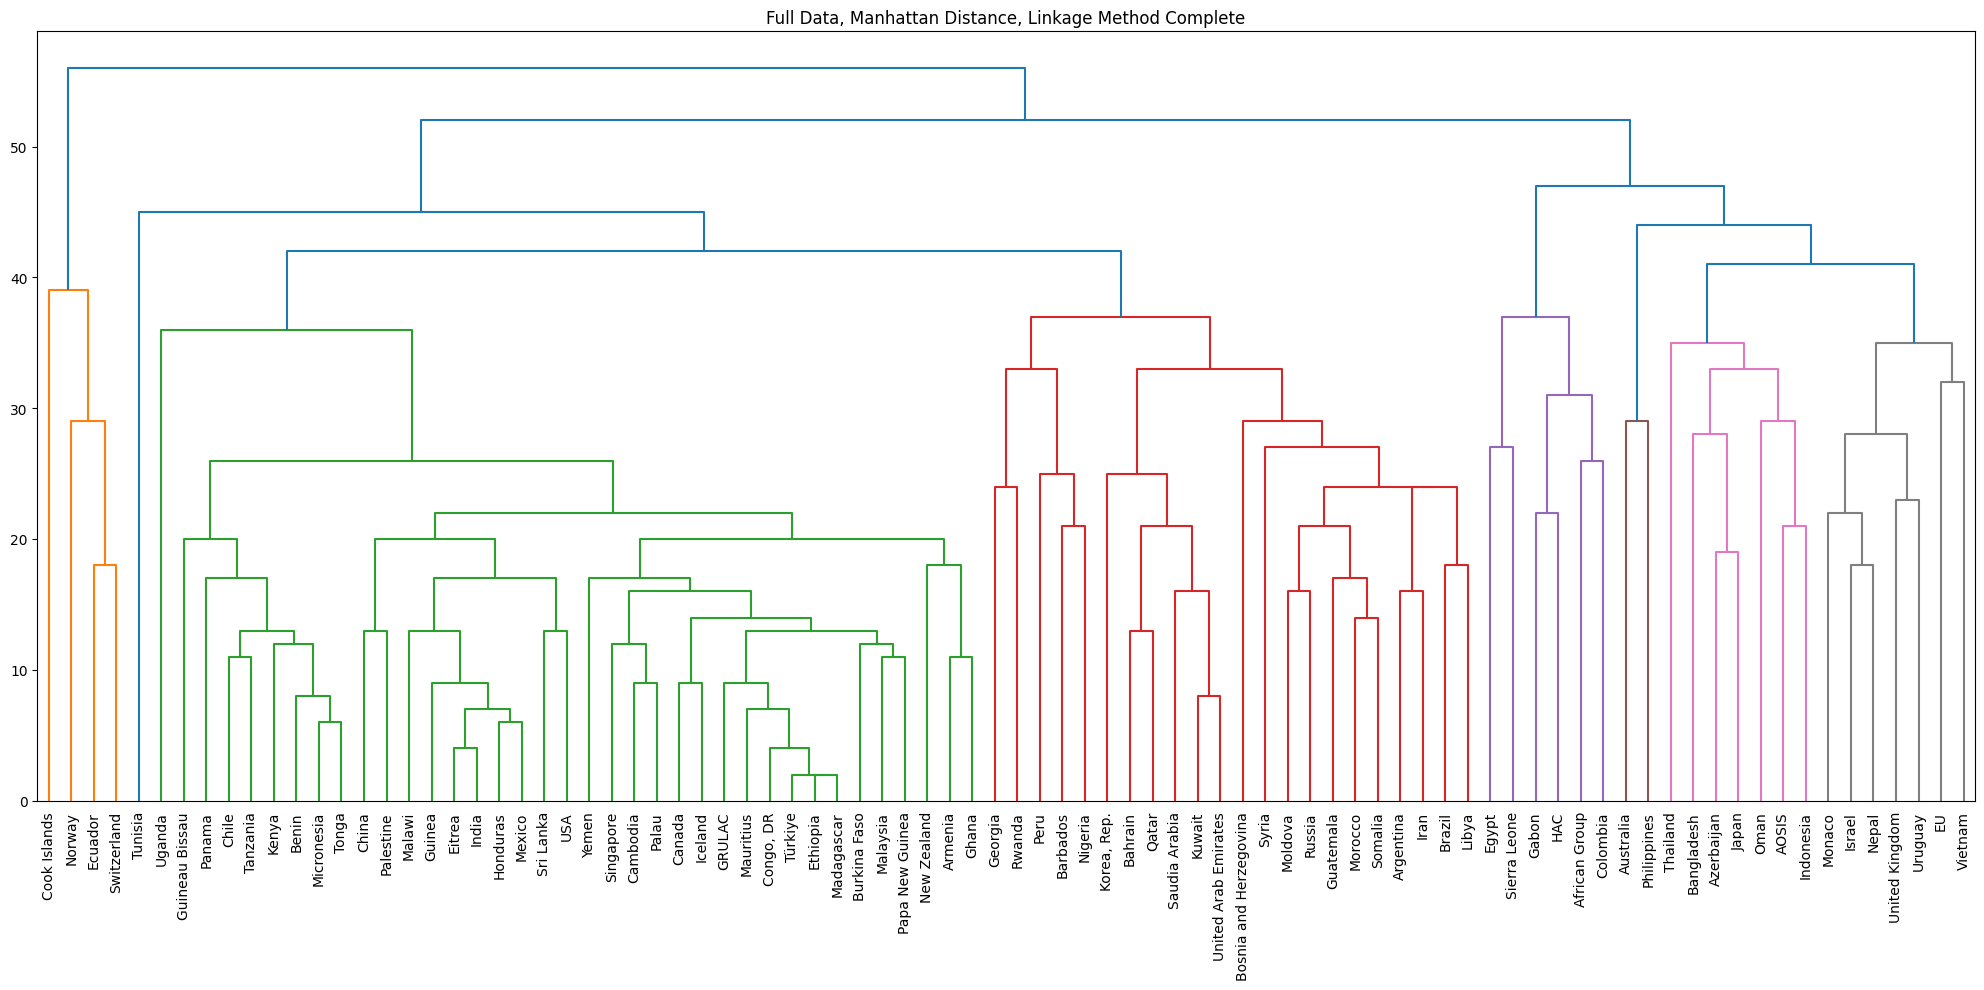

In [9]:
# same but for complete linkage

Z = linkage(vectors, 'complete', metric=manhattan_distance)
fig, ax = plt.subplots(1,1,figsize=(25, 10))

dn = dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10, ax=ax)
#save figure
ax.set_ylim(-0.05)
plt.title('Full Data, Manhattan Distance, Linkage Method Complete')
fig.savefig('Figures/Entire_data_1/dendrogram_complete.png', bbox_inches='tight')

plt.show()


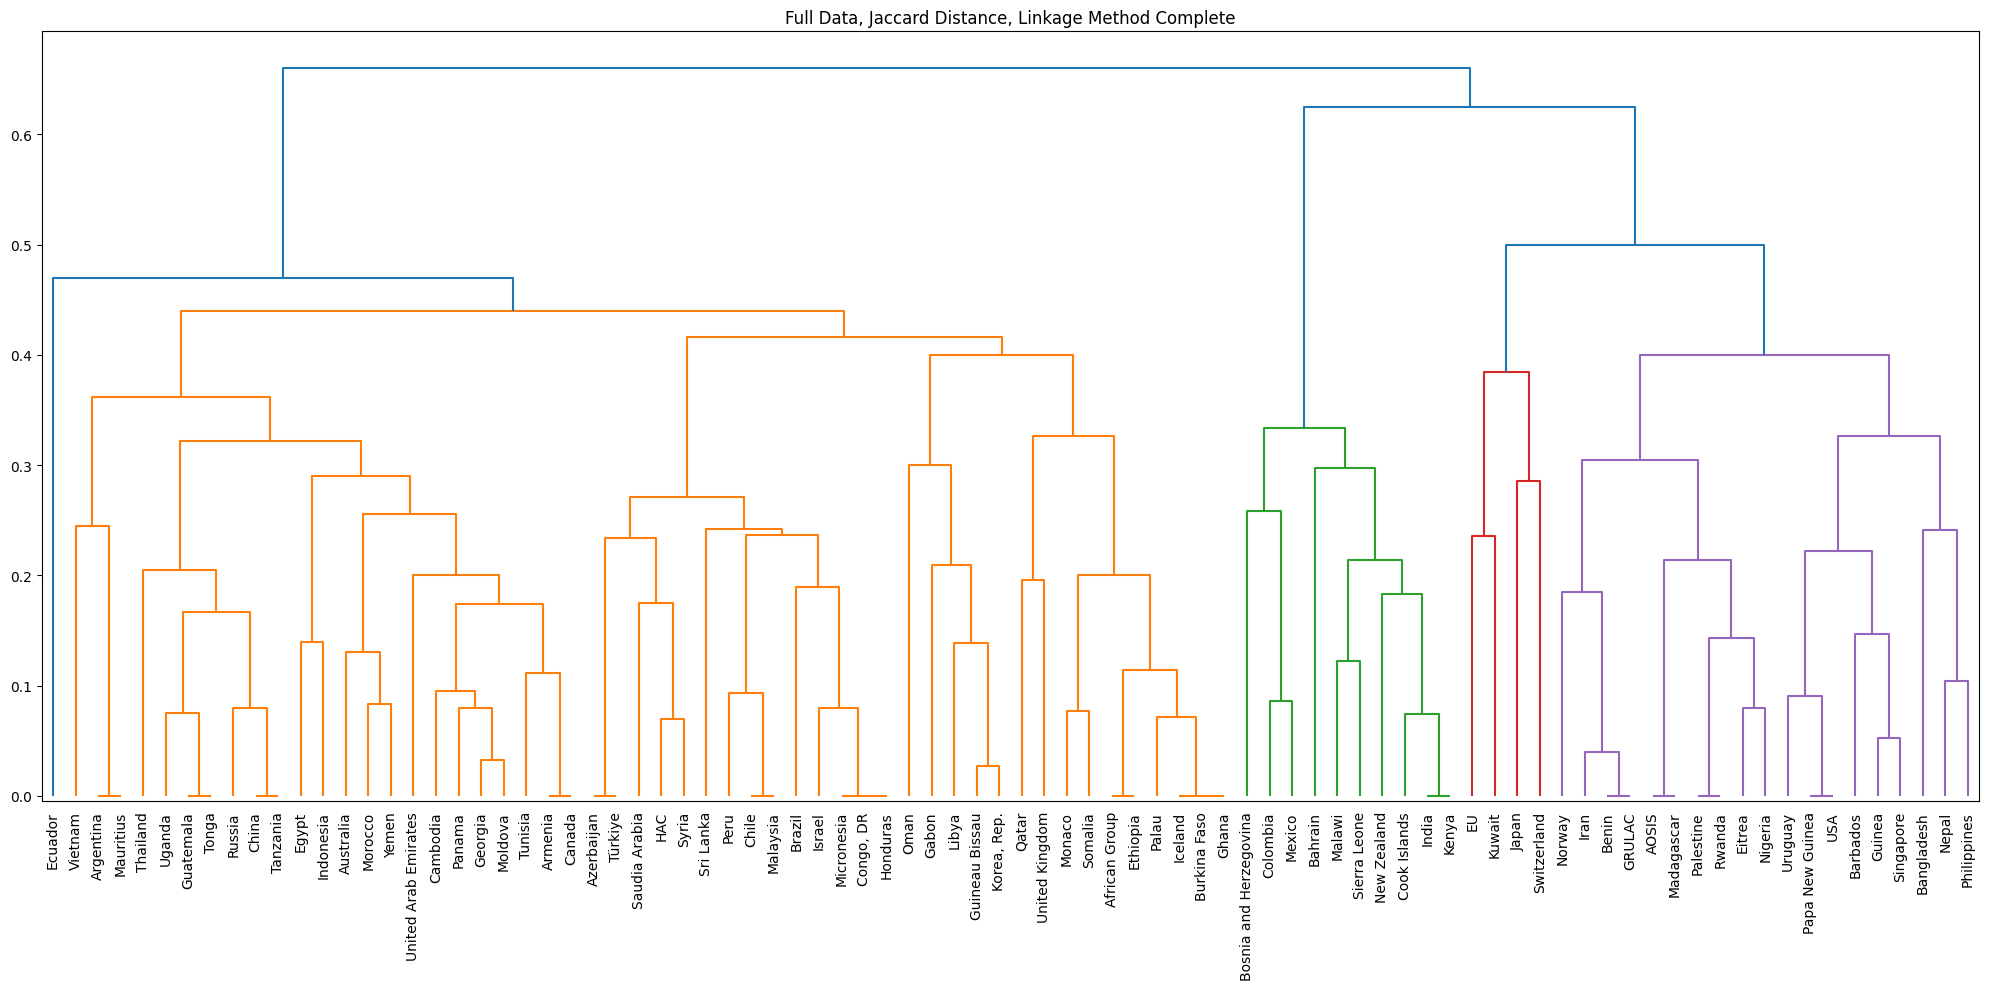

In [10]:
# same but for jaccard

Z = linkage(vectors, 'complete', metric=jaccard_distance)
fig, ax = plt.subplots(1,1,figsize=(25, 10))

dn = dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10, ax=ax)
#save figure
ax.set_ylim(-0.005)
plt.title('Full Data, Jaccard Distance, Linkage Method Complete')
fig.savefig('Figures/Entire_data_1/dendrogram_complete_jaccard.png', bbox_inches='tight')

plt.show()
